In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv(r'C:\Users\Ritu\MachineLearning\Project 3 Crop yield prediction\Datasets\yield_df.csv')
df

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [7]:
#missing value 
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [9]:
# so there is no missing value
#lets generate it
np.random.seed(42)

for col in df.columns:  
    random_index = np.random.rand(len(df)) < 0.01  
    df.loc[random_index, col] = np.nan  

df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990.0,36613.0,1485.0,121.00,16.37
1,Albania,Potatoes,1990.0,66667.0,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990.0,23333.0,1485.0,121.00,16.37
3,Albania,Sorghum,1990.0,12500.0,1485.0,121.00,16.37
4,Albania,Soybeans,1990.0,7000.0,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013.0,22581.0,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013.0,3066.0,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013.0,13142.0,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013.0,22222.0,657.0,2550.07,19.76


In [11]:
#missing value 
df.isnull().sum()

Area                             267
Item                             296
Year                             277
hg/ha_yield                      284
average_rain_fall_mm_per_year    271
pesticides_tonnes                263
avg_temp                         287
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           27975 non-null  object 
 1   Item                           27946 non-null  object 
 2   Year                           27965 non-null  float64
 3   hg/ha_yield                    27958 non-null  float64
 4   average_rain_fall_mm_per_year  27971 non-null  float64
 5   pesticides_tonnes              27979 non-null  float64
 6   avg_temp                       27955 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.5+ MB


In [15]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,27965.000000,27958.000000,27971.000000,27979.000000,27955.000000
mean,2001.545396,77028.195114,1148.881091,37104.838041,20.540972
std,7.050621,84889.588581,709.823427,60017.504761,6.309166
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19912.000000,593.000000,1695.710000,16.700000
50%,2001.000000,38295.000000,1083.000000,17517.760000,21.510000
75%,2008.000000,104543.000000,1668.000000,48715.510000,26.000000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [17]:
# replace all float value with mean of that column
#and categolical value with mode
'''df['year']=df['Year'].fillna(df['Year'].mean())
df['hg/ha_yield']=df['hg/ha_yield'].fillna(df['hg/ha_yield'].mean())
df['average_rain_fall_mm_per_year']=df['average_rain_fall_mm_per_year'].fillna(df['average_rain_fall_mm_per_year'].mean())
df['pesticides_tonnes']=df['pesticides_tonnes'].fillna(df['pesticides_tonnes'].mean())
df['avg_temp']=df['avg_temp'].fillna(df['avg_temp'].mean())
'''
for col in df.columns:
    if df[col].dtype==float:
        df[col]=df[col].fillna(df[col].mean())

In [19]:
df.isnull().sum()

Area                             267
Item                             296
Year                               0
hg/ha_yield                        0
average_rain_fall_mm_per_year      0
pesticides_tonnes                  0
avg_temp                           0
dtype: int64

In [21]:
for col in df.columns:
    if df[col].dtype==object:
        df[col]=df[col].fillna(df[col].mode()[0])

In [23]:
#df.drop(columns=['year'],inplace=True)
df.isnull().sum()


Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [25]:
df.duplicated().sum()

2004

In [27]:
df=df.drop_duplicates()

In [29]:
df.duplicated().sum()

0

In [31]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,26238.000000,26238.000000,26238.000000,26238.000000,26238.000000
mean,2001.560640,76975.714133,1146.696386,35073.275873,20.440869
std,7.017965,84164.637875,712.792170,57281.098249,6.385599
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,20000.000000,593.000000,1597.000000,16.660000
50%,2001.000000,40252.000000,1083.000000,16189.880000,21.320000
75%,2008.000000,103163.250000,1668.000000,45620.000000,26.040000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


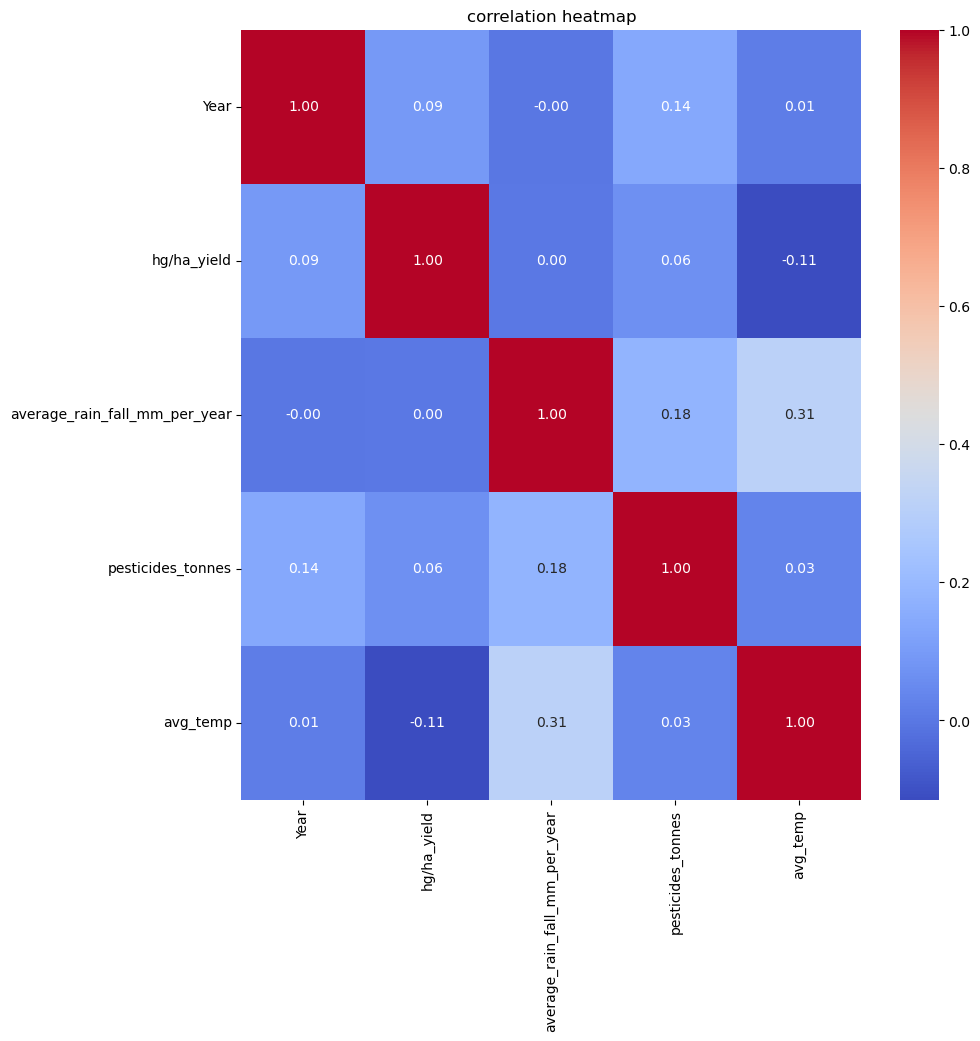

In [7]:
numeric_col=df.select_dtypes(include=[float,int])
matrix=numeric_col.corr()
#matrix
#heat map
plt.figure(figsize=(10,10))
sns.heatmap(matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('correlation heatmap')
plt.show()

In [9]:
df['Area'].unique()

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'Colombia', 'Croatia',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Eritrea', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Italy',
       'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lebanon',
       'Lesotho', 'Libya', 'Lithuania', 'Madagascar', 'Malawi',
       'Malaysia', 'Mali', 'Mauritania', 'Mauritius', 'Mexico',
       'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Norway',
       'Pakistan', 'Papua New Guinea', 'Peru', 'Pola

In [11]:
len(df['Area'].unique())

101

In [13]:
df['Item'].unique()

array(['Maize', 'Potatoes', 'Rice, paddy', 'Sorghum', 'Soybeans', 'Wheat',
       'Cassava', 'Sweet potatoes', 'Plantains and others', 'Yams'],
      dtype=object)

In [15]:
len(df['Item'].unique())

10

In [17]:
df.rename(columns={'hg/ha_yield': 'yield', 'average_rain_fall_mm_per_year': 'rainfall'}, inplace=True)


In [19]:
df

,Area,Item,Year,yield,rainfall,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [22]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df[['yield', 'rainfall', 'pesticides_tonnes', 'avg_temp']] = df[['yield', 'rainfall', 'pesticides_tonnes', 'avg_temp']].apply(pd.to_numeric)

In [24]:
df

,Area,Item,Year,yield,rainfall,pesticides_tonnes,avg_temp
0,Albania,Maize,1990-01-01,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990-01-01,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990-01-01,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990-01-01,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990-01-01,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013-01-01,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013-01-01,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013-01-01,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013-01-01,22222,657.0,2550.07,19.76


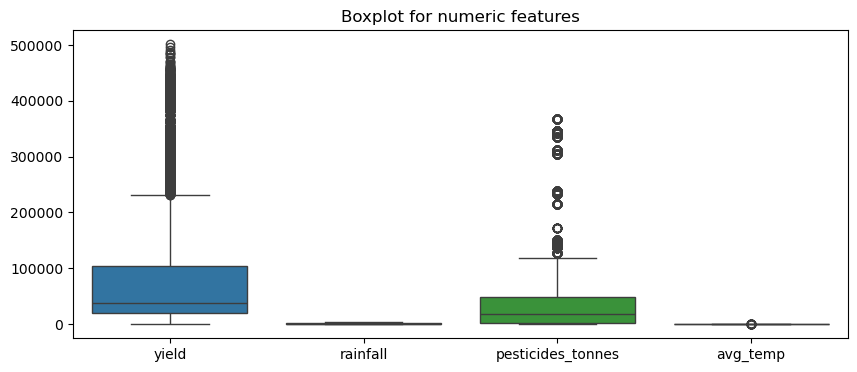

In [26]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[['yield', 'rainfall', 'pesticides_tonnes', 'avg_temp']])
plt.title("Boxplot for numeric features")
plt.show()

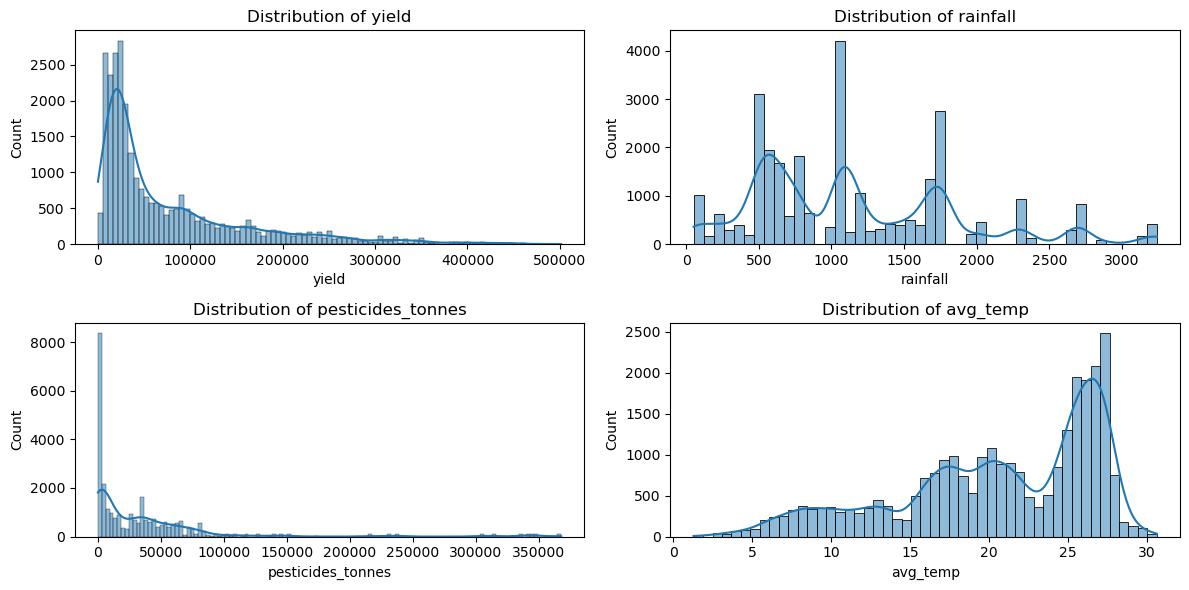

In [27]:
import matplotlib.pyplot as plt

#plt.hist(df['pesticides_tonnes'], bins=30, edgecolor='black')
#plt.title('Histogram')
#plt.xlabel('Value')
#plt.ylabel('Frequency')
#plt.show()
plt.figure(figsize=(12, 6))
for i, col in enumerate(['yield', 'rainfall', 'pesticides_tonnes', 'avg_temp']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [31]:
for col in df.columns:
    if df[col].dtype == float:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        num_outliers = len(outliers)

       
        df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

        print(f"Column '{col}' has {num_outliers} outliers replaced.")


Column 'rainfall' has 0 outliers replaced.
Column 'pesticides_tonnes' has 1418 outliers replaced.
Column 'avg_temp' has 34 outliers replaced.


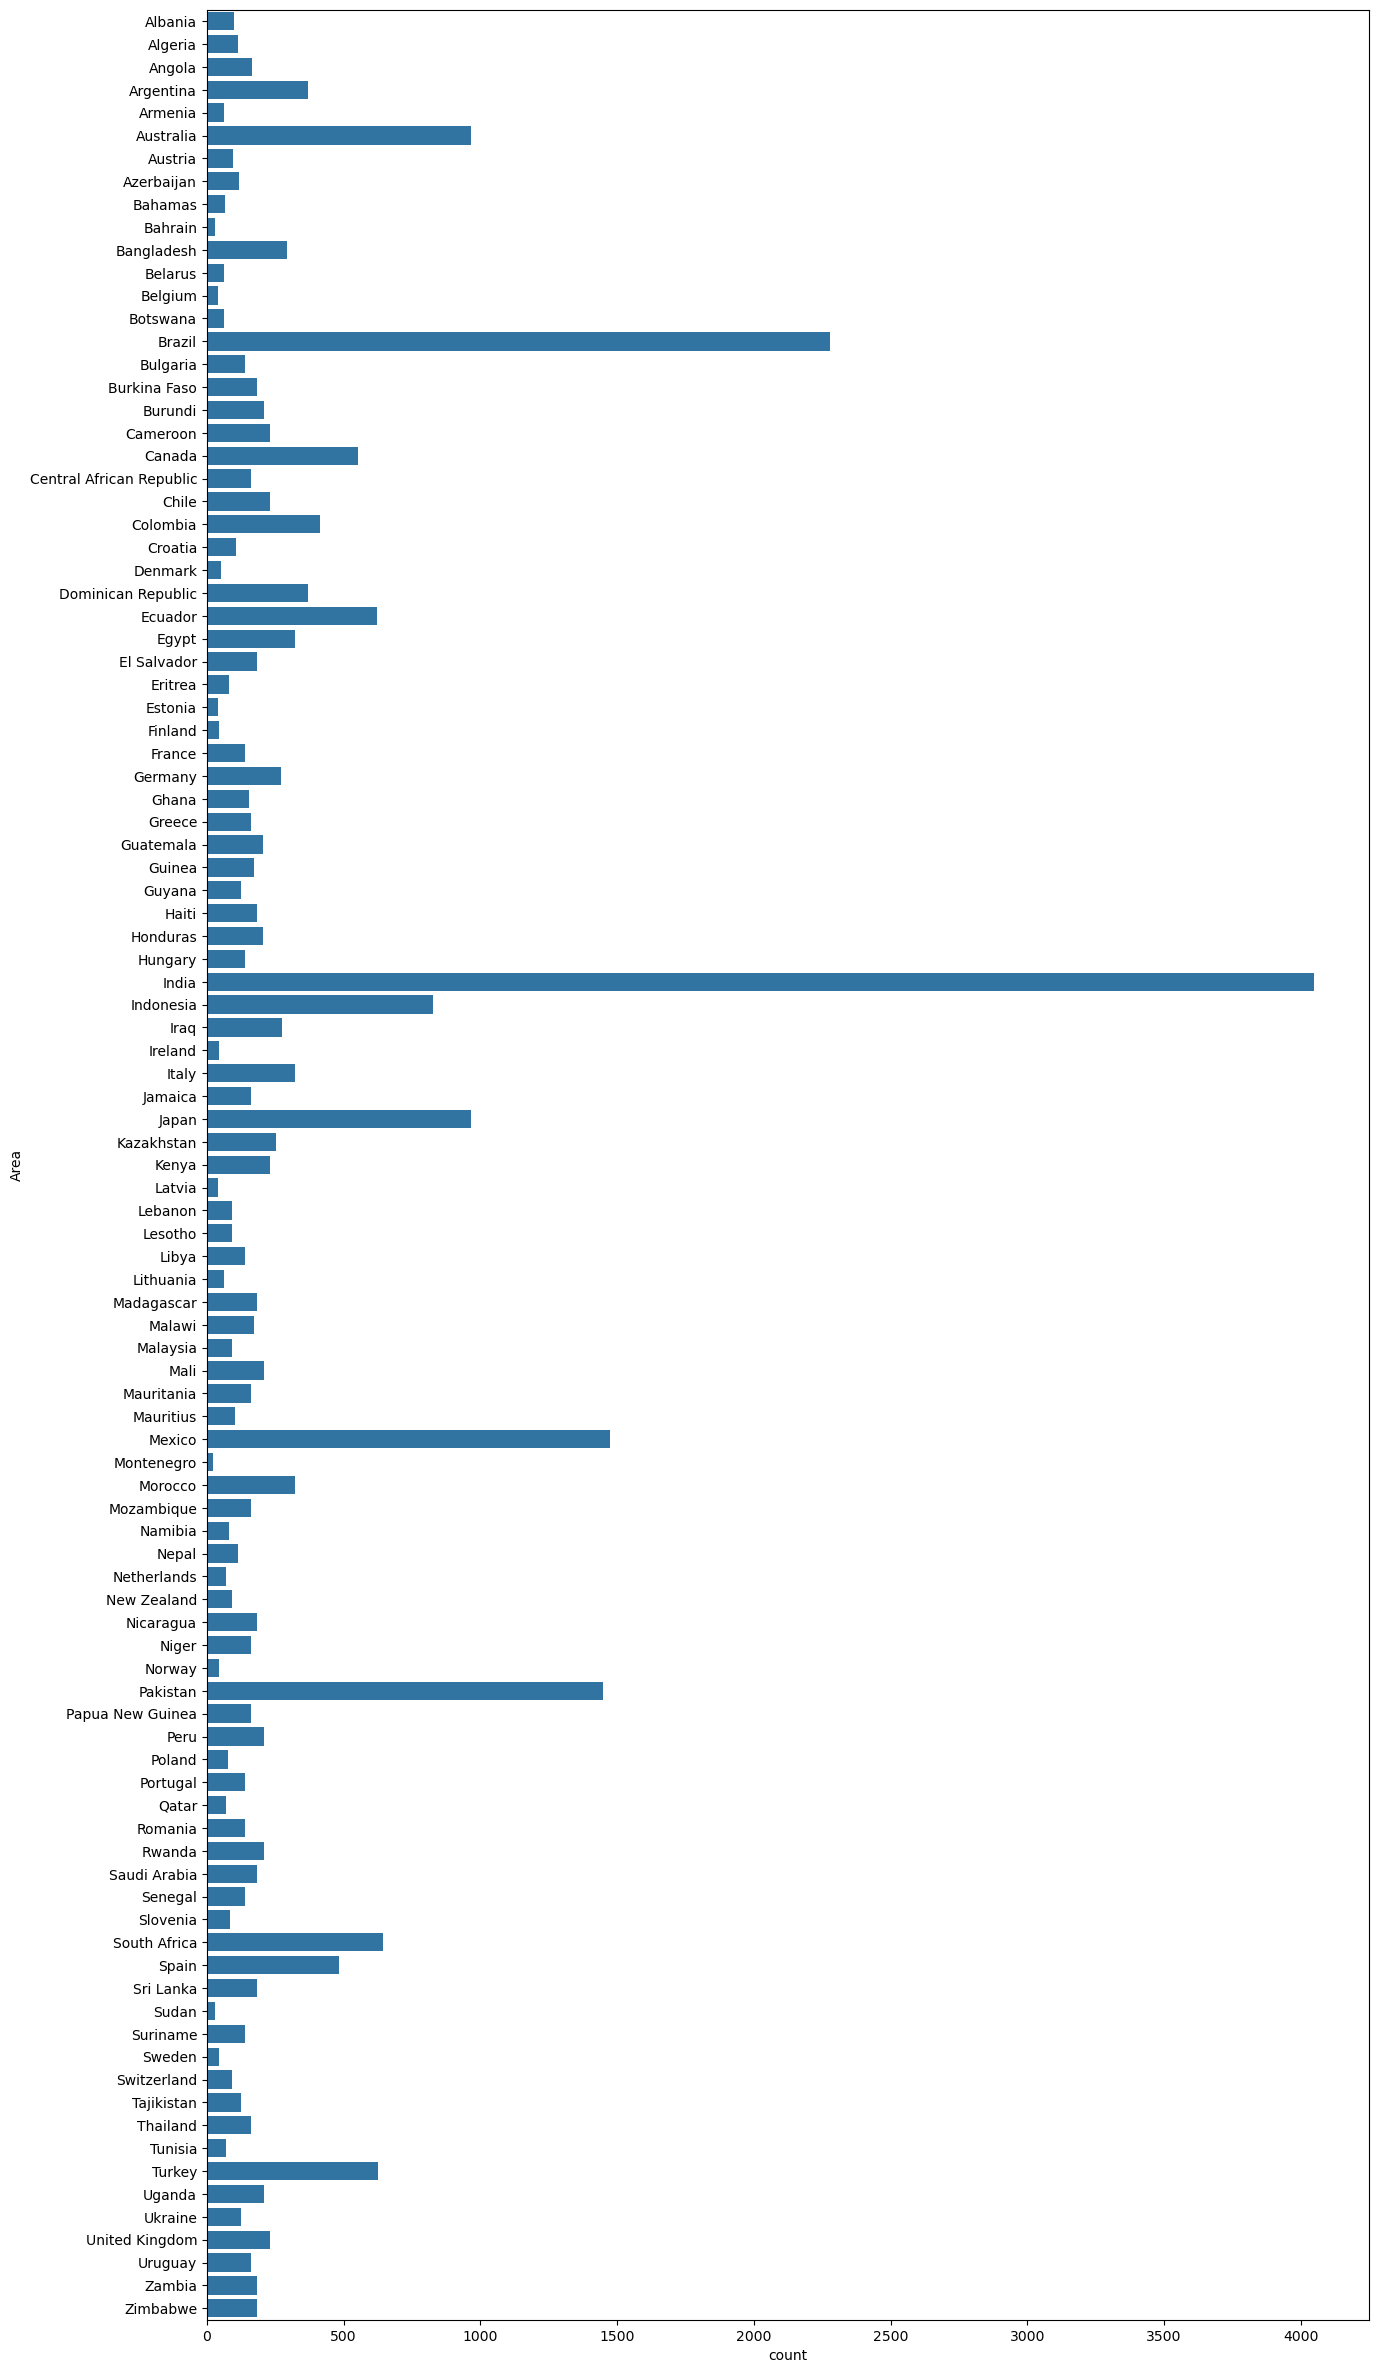

In [33]:
#Data Distribution Across Areas (Countries)
plt.figure(figsize=(15,30))
sns.countplot(y=df['Area'])
plt.show()
#india has more data followed by brazil,maxicoand pak

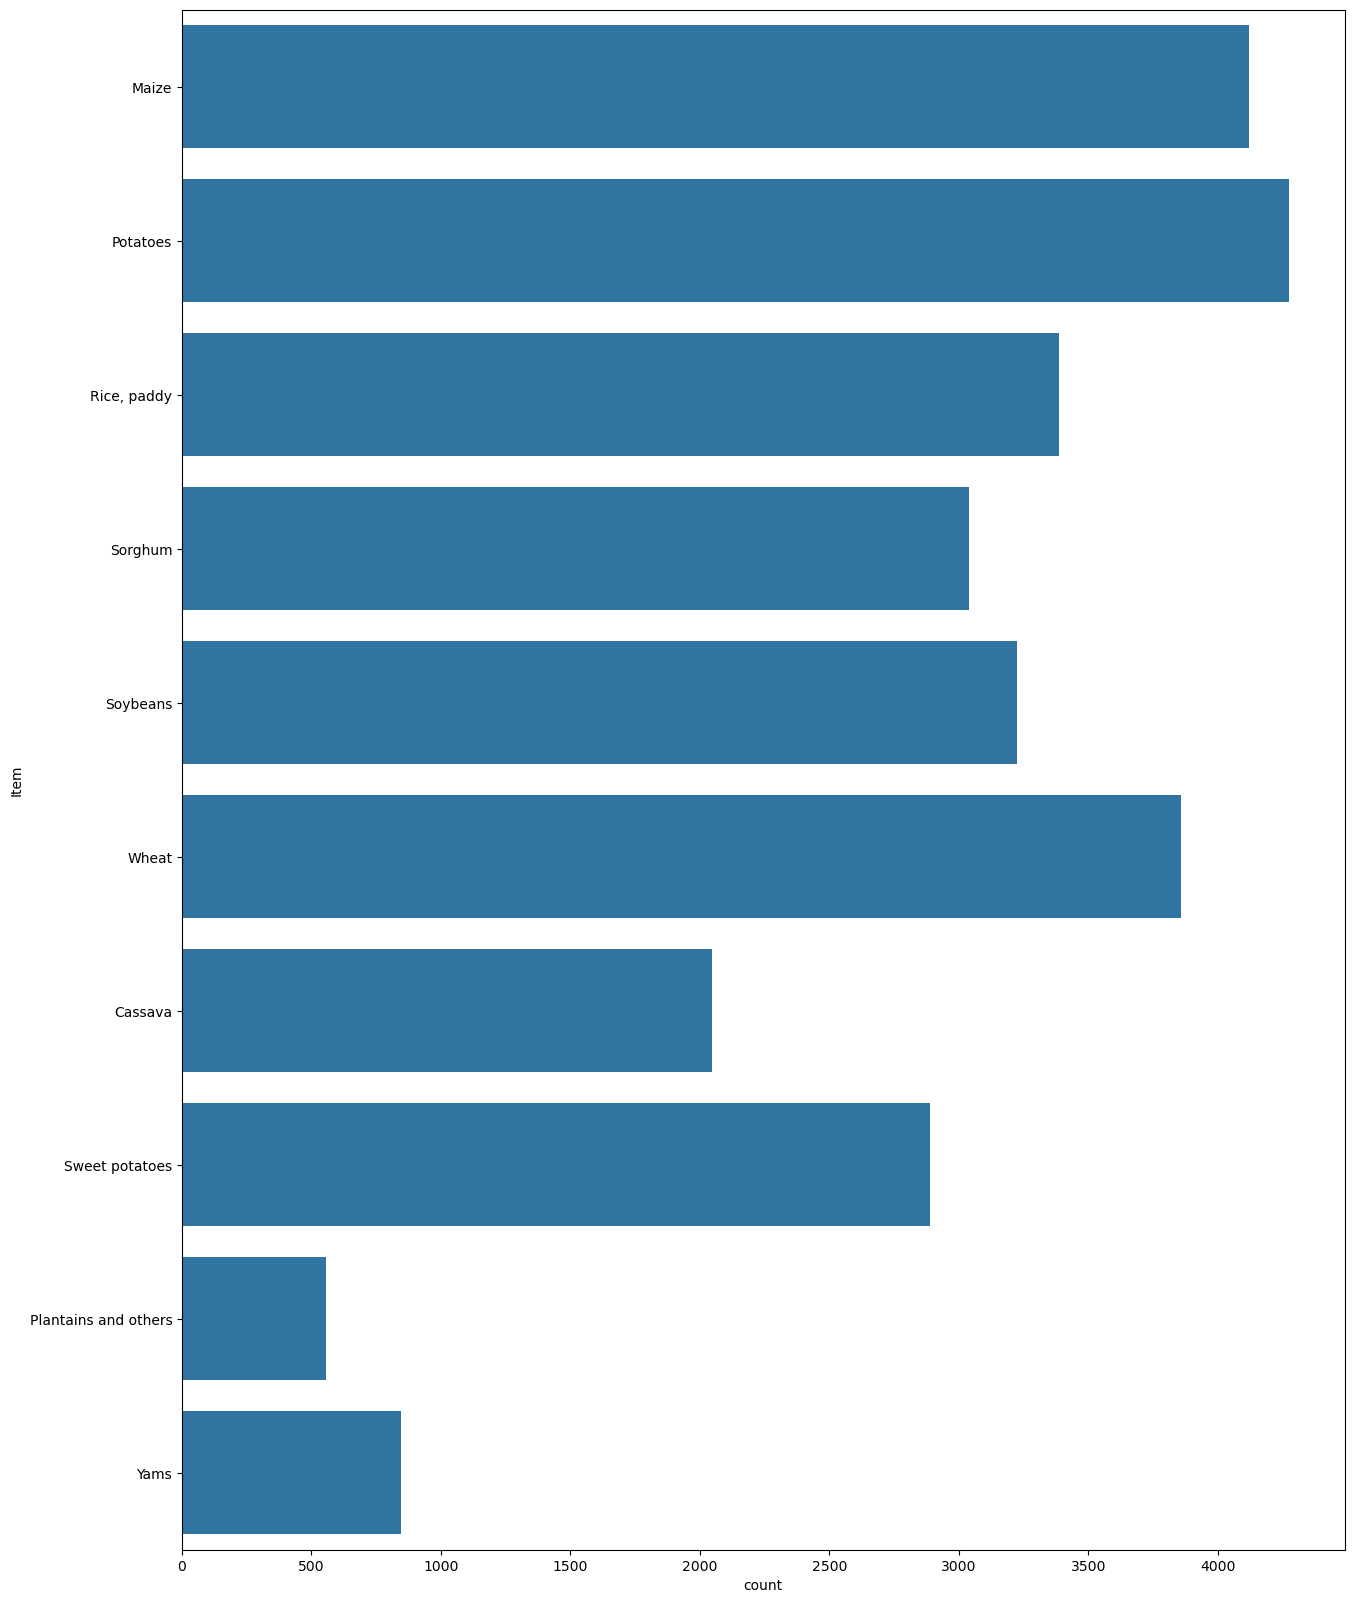

In [35]:
#Frequency of Each Crop/Item
plt.figure(figsize=(15,20))
sns.countplot(y=df['Item'])
plt.show()
#potatoes has highest occerance in dataset

In [37]:
(df['Area'].value_counts()<400).sum()

88

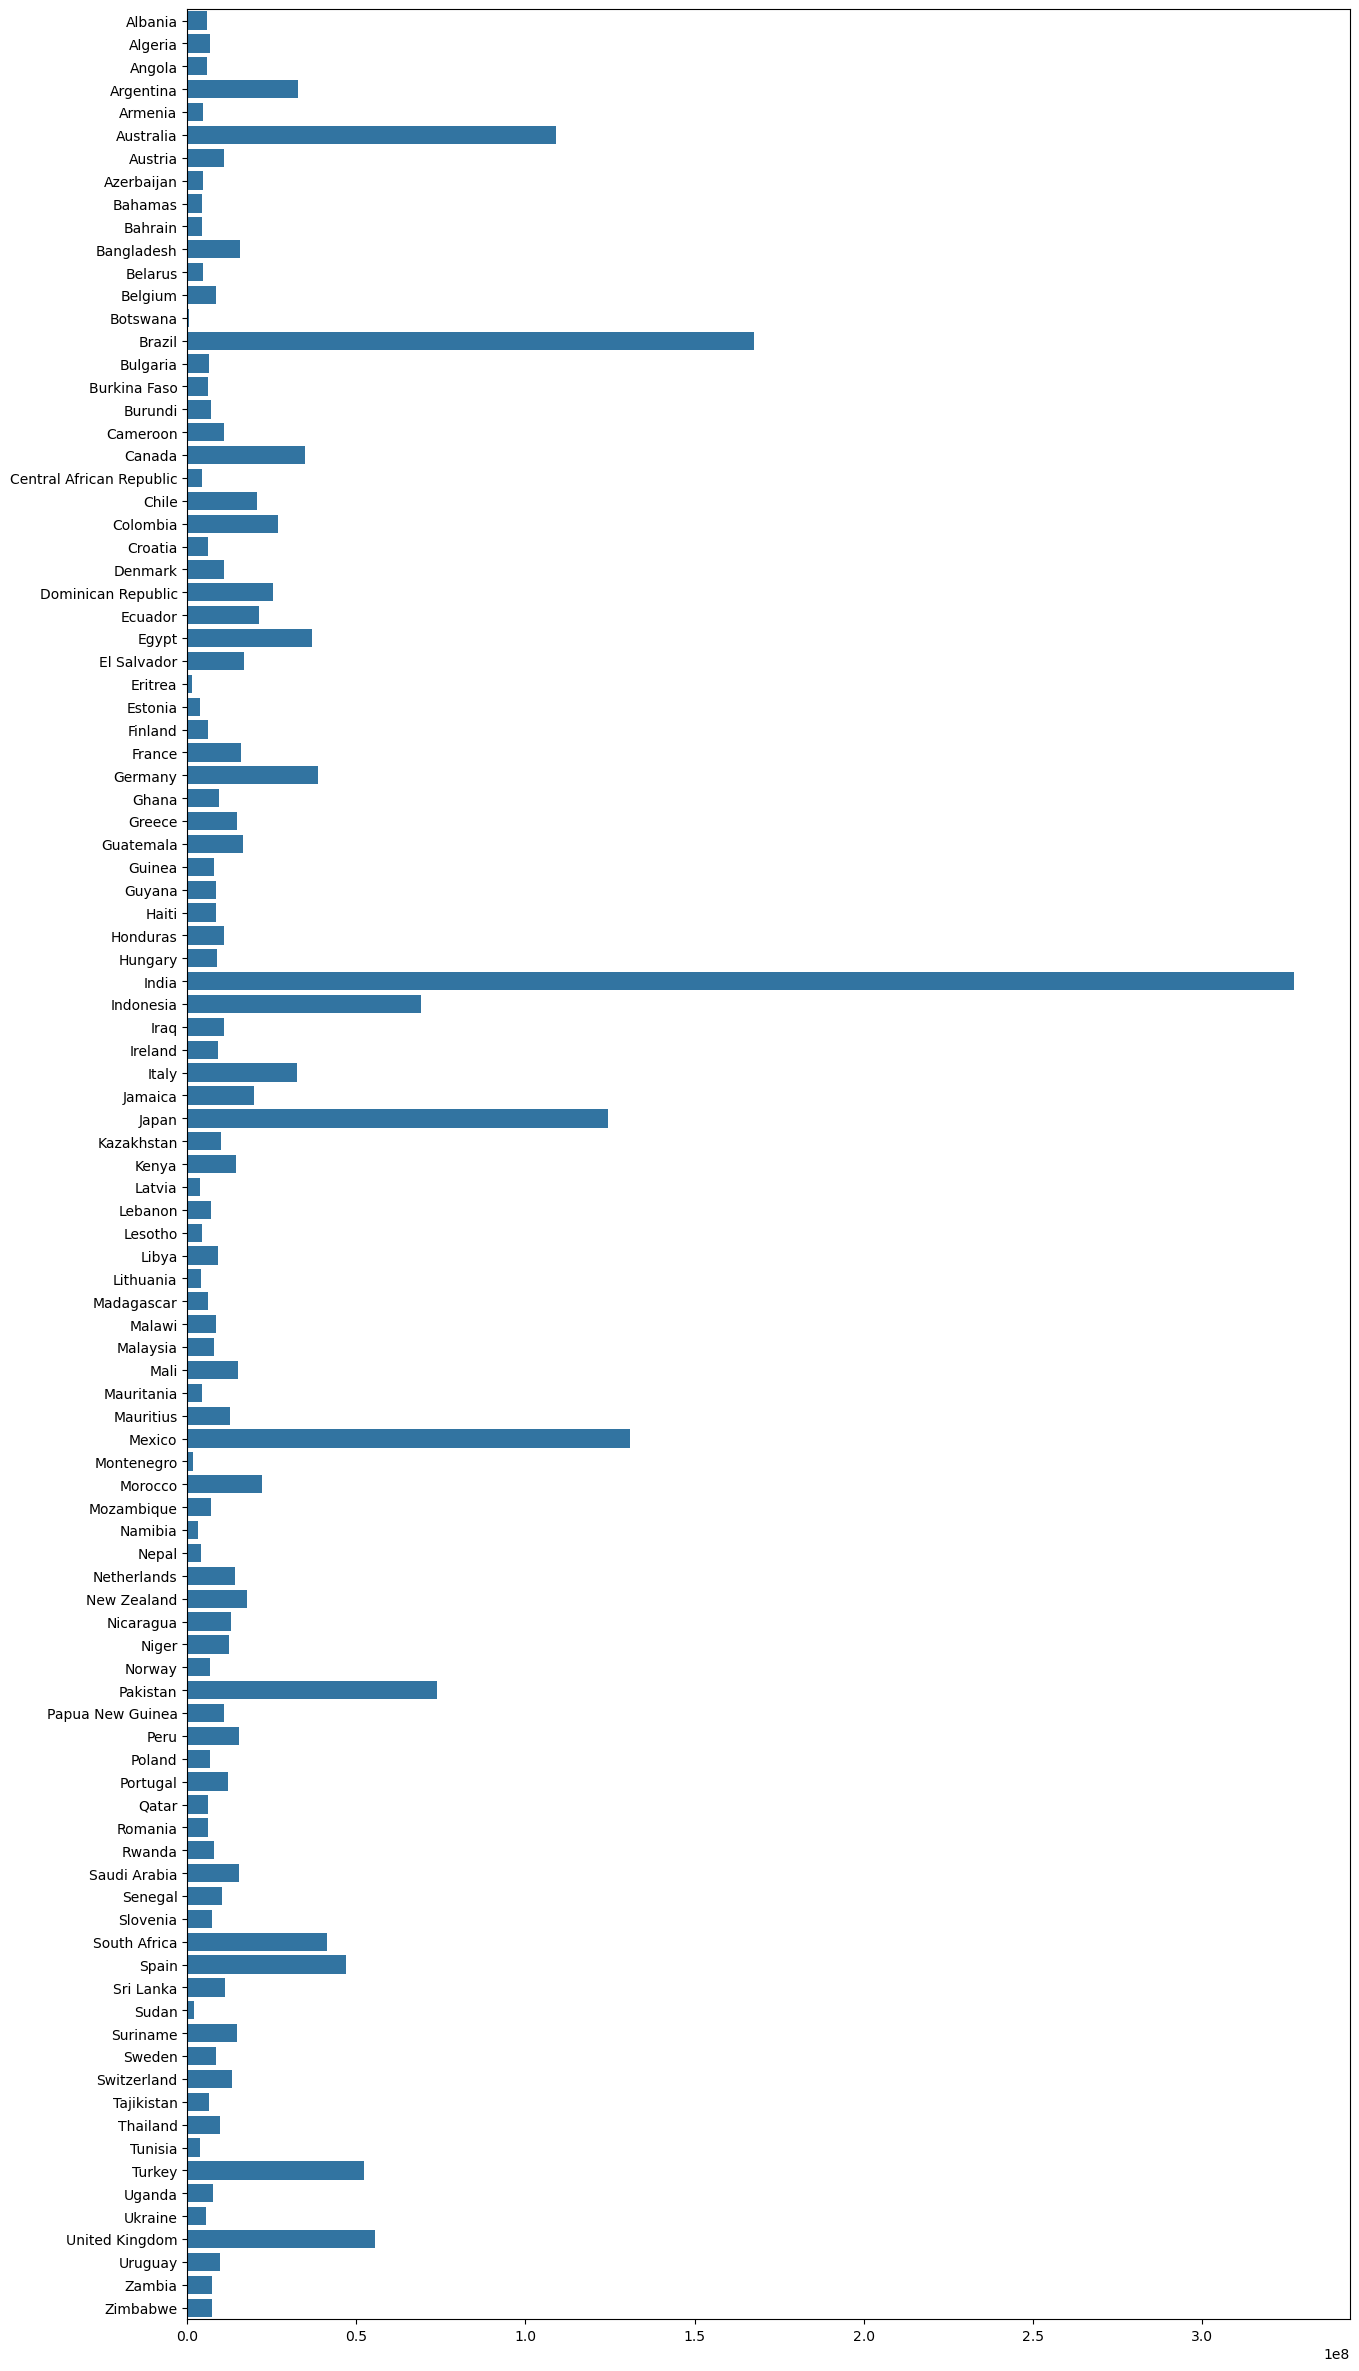

In [39]:
country=df['Area'].unique()
yield_per_country=[]
for state in country: 
    yield_per_country.append(df[df['Area']==state]['yield'].sum())
plt.figure(figsize=(15,30))
sns.barplot(y=country,x=yield_per_country)
plt.show()

In [40]:
crops=df['Item'].unique()
yield_per_crop=[]
for crop in crops: 
    yield_per_crop.append(df[df['Item']==crop]['yield'].sum())

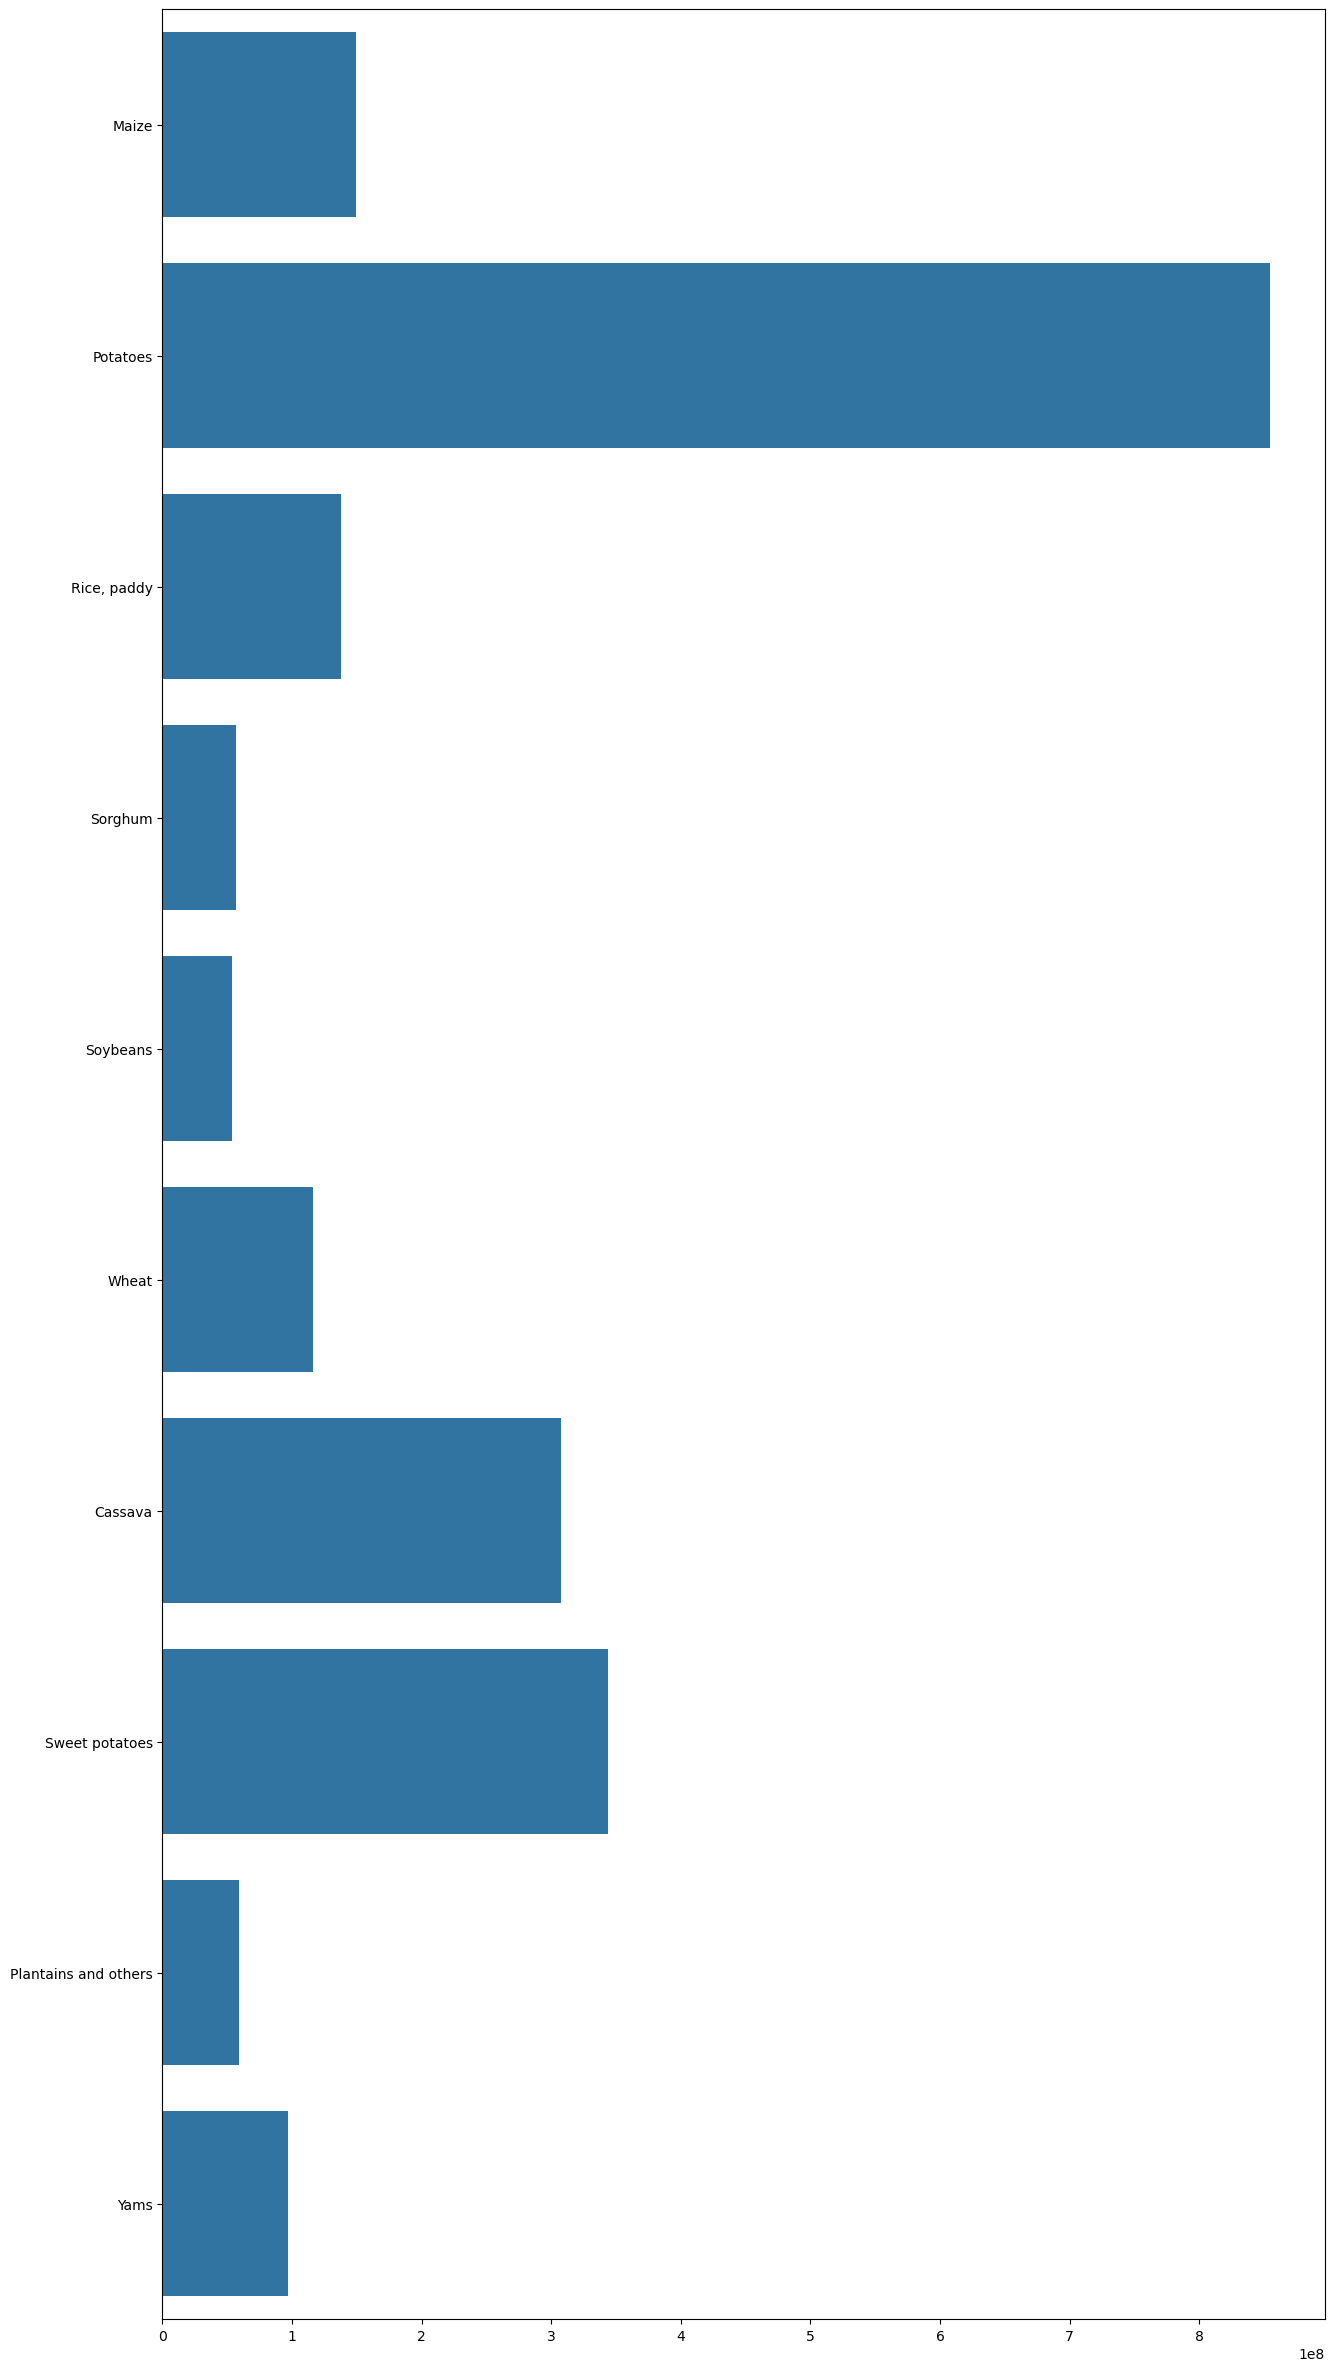

In [42]:
plt.figure(figsize=(15,30))
sns.barplot(y=crops,x=yield_per_crop)
plt.show()

In [45]:
df

,Area,Item,Year,yield,rainfall,pesticides_tonnes,avg_temp
0,Albania,Maize,1990-01-01,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990-01-01,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990-01-01,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990-01-01,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990-01-01,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013-01-01,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013-01-01,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013-01-01,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013-01-01,22222,657.0,2550.07,19.76


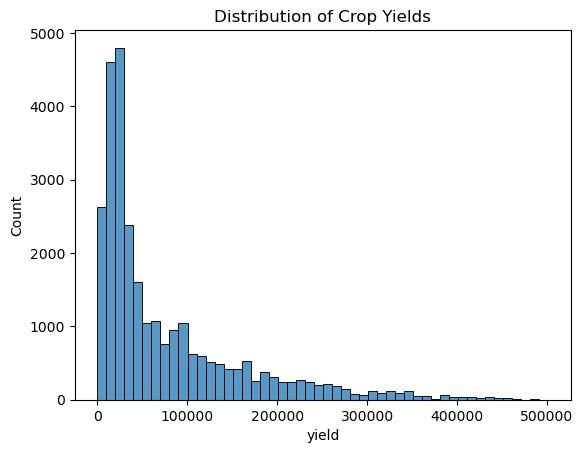

In [47]:
sns.histplot(df['yield'], bins=50)
plt.title("Distribution of Crop Yields")
plt.show()
#its right skew and common yield range is between 0-100000

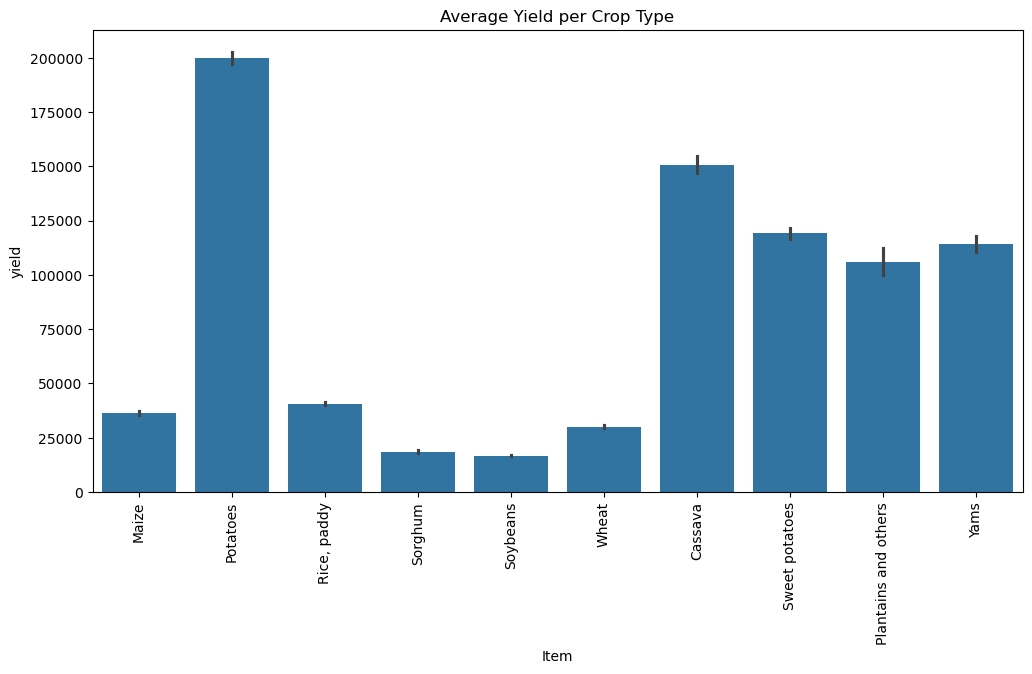

In [49]:
#Average Yield by Crop Type
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Item', y='yield', estimator='mean')
plt.xticks(rotation=90)
plt.title("Average Yield per Crop Type")
plt.show()


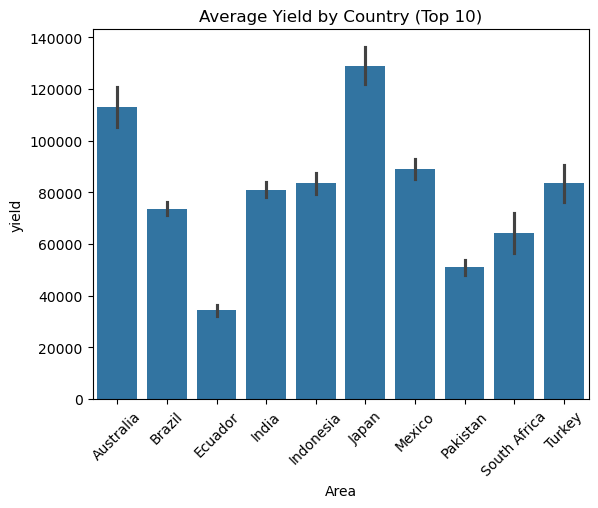

In [51]:
#Average Yield by Country
top_areas = df['Area'].value_counts().head(10).index
df_top = df[df['Area'].isin(top_areas)]
sns.barplot(data=df_top, x='Area', y='yield', estimator='mean')
plt.xticks(rotation=45)
plt.title("Average Yield by Country (Top 10)")
plt.show()


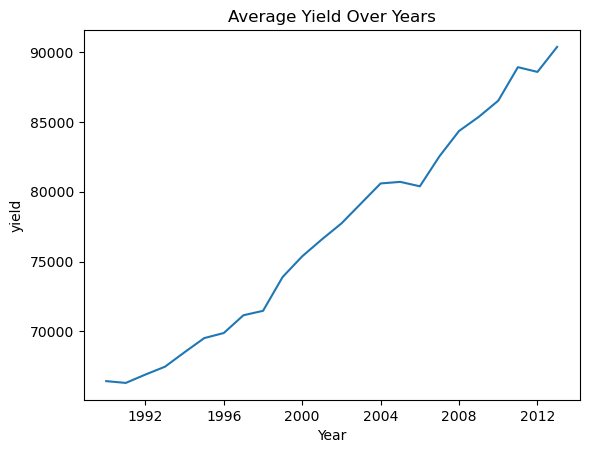

In [53]:
#Yield Trend Over Time
df_yearly = df.groupby('Year')['yield'].mean().reset_index()
sns.lineplot(data=df_yearly, x='Year', y='yield')
plt.title("Average Yield Over Years")
plt.show()


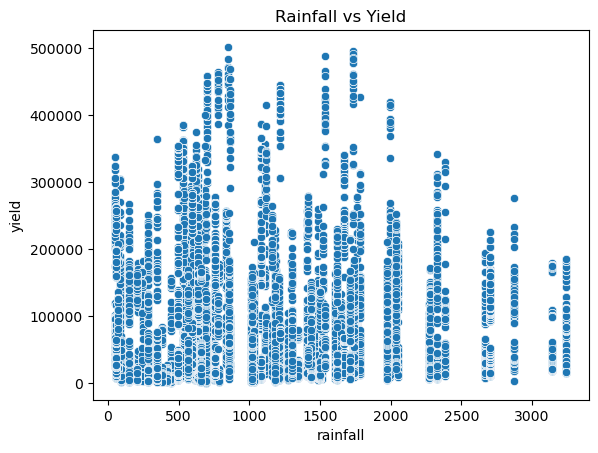

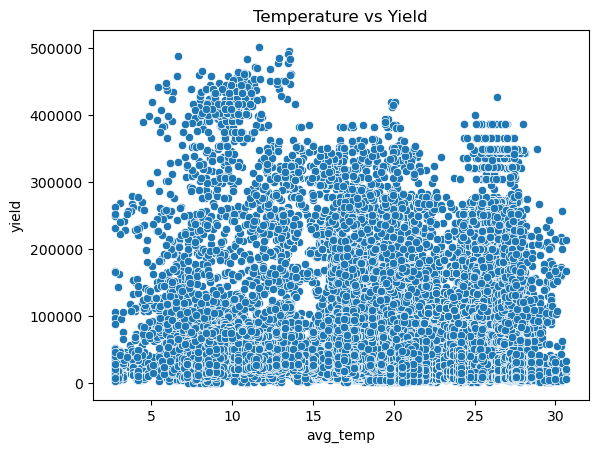

In [55]:
#Effect of Rainfall / Temperature / Pesticides on Yield
sns.scatterplot(data=df, x='rainfall', y='yield')
plt.title("Rainfall vs Yield")
plt.show()

sns.scatterplot(data=df, x='avg_temp', y='yield')
plt.title("Temperature vs Yield")
plt.show()


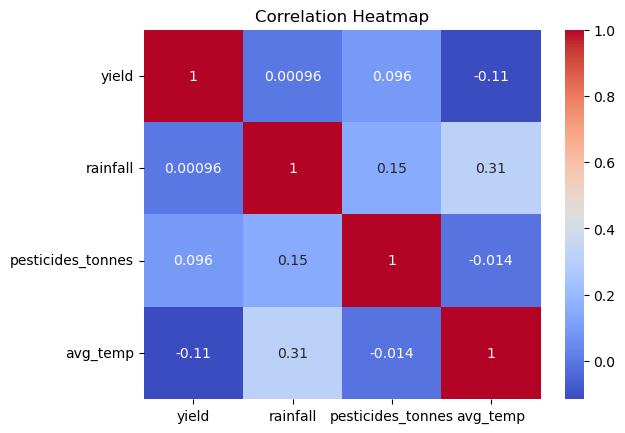

In [57]:
#Heatmap of Correlation
sns.heatmap(df[['yield', 'rainfall', 'pesticides_tonnes', 'avg_temp']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [106]:
cov_matrix = df[['yield', 'rainfall', 'pesticides_tonnes', 'avg_temp']].cov()
cov_matrix

,yield,rainfall,pesticides_tonnes,avg_temp
yield,1.000035,0.682961,0.095808,-0.724646
rainfall,0.682961,503833.288216,106.509085,1402.079685
pesticides_tonnes,0.095808,106.509085,1.000035,-0.091271
avg_temp,-0.724646,1402.079685,-0.091271,39.815252


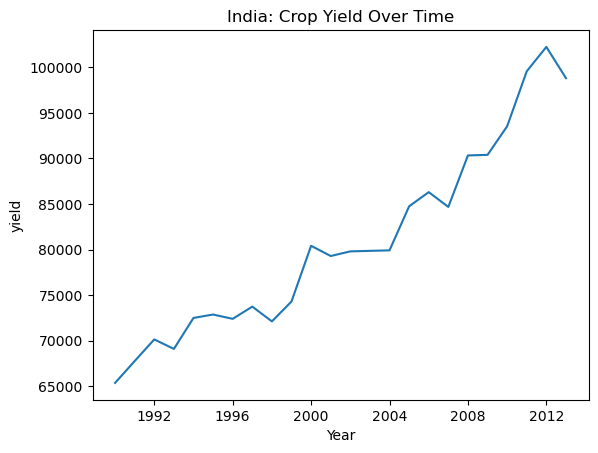

In [59]:
#Crop Production Trends by Country
df_group = df[df['Area'] == 'India'].groupby('Year')['yield'].mean().reset_index()
sns.lineplot(data=df_group, x='Year', y='yield')
plt.title("India: Crop Yield Over Time")
plt.show()


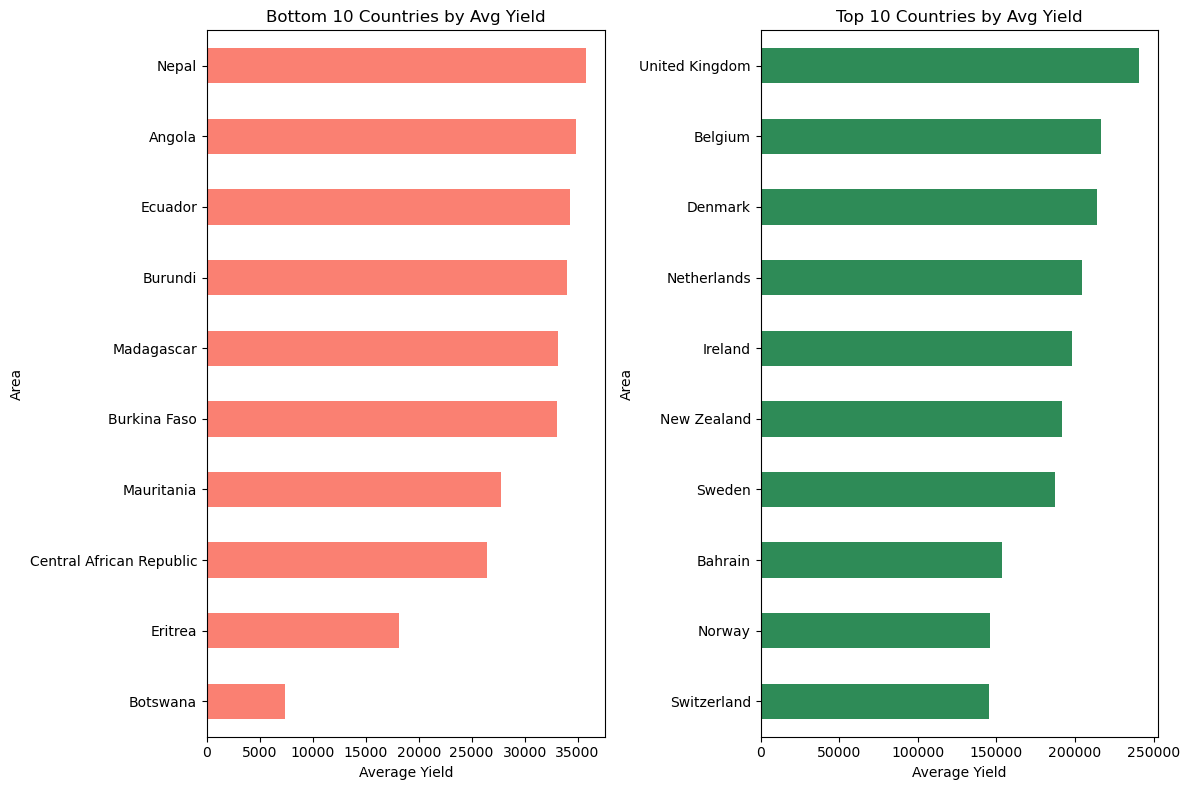

In [61]:
#Top & Bottom 10 Countries by Average Yield
avg_yield_by_country = df.groupby('Area')['yield'].mean().sort_values()

plt.figure(figsize=(12,8))

# Bottom 10
plt.subplot(1,2,1)
avg_yield_by_country.head(10).plot(kind='barh', color='salmon')
plt.title('Bottom 10 Countries by Avg Yield')
plt.xlabel('Average Yield')

# Top 10
plt.subplot(1,2,2)
avg_yield_by_country.tail(10).plot(kind='barh', color='seagreen')
plt.title('Top 10 Countries by Avg Yield')
plt.xlabel('Average Yield')

plt.tight_layout()
plt.show()
#top is uk and from bottom is uganda

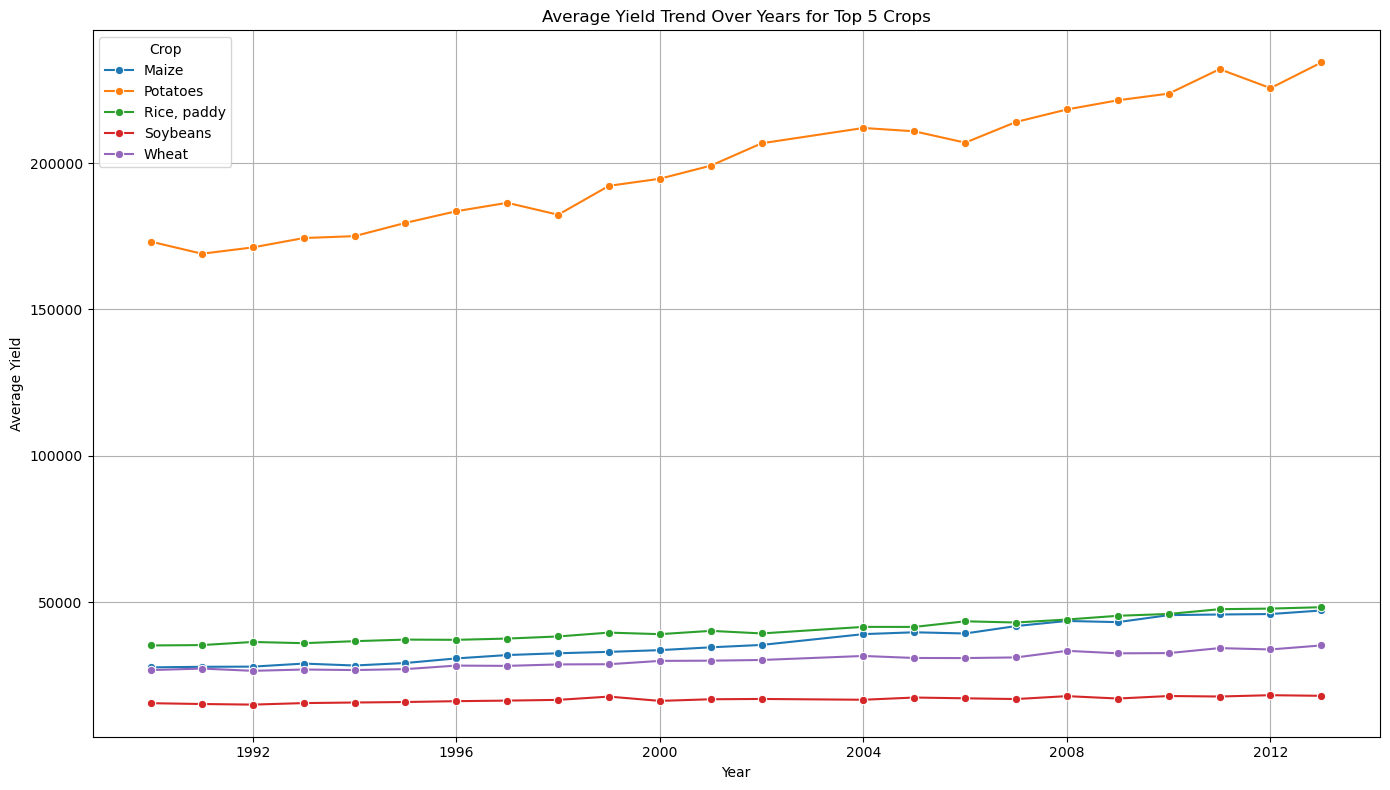

In [63]:


# Group by year and crop to get average yield
avg_yield_trend = df.groupby(['Year', 'Item'])['yield'].mean().reset_index()

# Filter for top 5 crops 
top_crops = df['Item'].value_counts().head(5).index
filtered_data = avg_yield_trend[avg_yield_trend['Item'].isin(top_crops)]

plt.figure(figsize=(14, 8))
sns.lineplot(data=filtered_data, x='Year', y='yield', hue='Item', marker='o')
plt.title('Average Yield Trend Over Years for Top 5 Crops')
plt.ylabel('Average Yield')
plt.xlabel('Year')
plt.legend(title='Crop')
plt.grid(True)
plt.tight_layout()
plt.show()



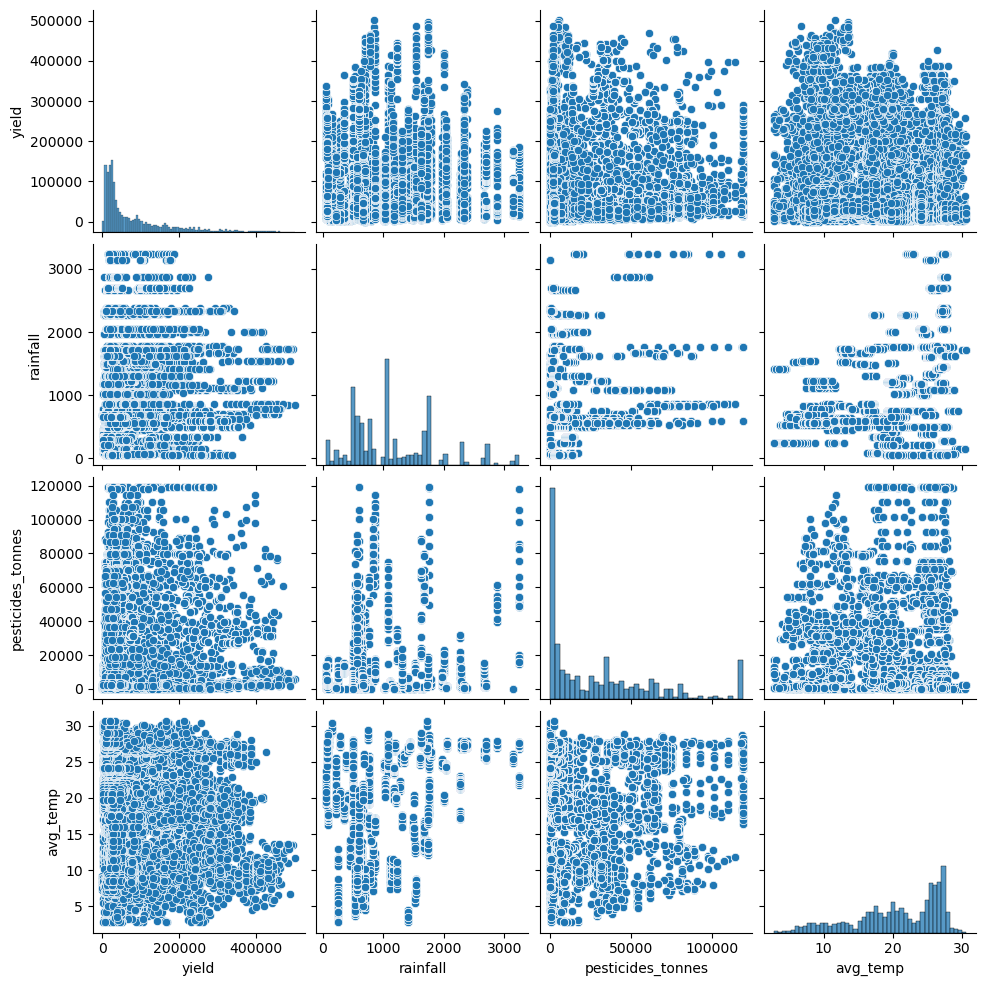

In [65]:
sns.pairplot(df[['yield', 'rainfall', 'pesticides_tonnes', 'avg_temp']])
plt.show()

In [67]:
df

,Area,Item,Year,yield,rainfall,pesticides_tonnes,avg_temp
0,Albania,Maize,1990-01-01,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990-01-01,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990-01-01,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990-01-01,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990-01-01,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013-01-01,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013-01-01,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013-01-01,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013-01-01,22222,657.0,2550.07,19.76


In [69]:
df['Year'] = df['Year'].dt.year

In [71]:
df

,Area,Item,Year,yield,rainfall,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [74]:
df

,Area,Item,Year,yield,rainfall,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [76]:
import numpy as np
df.loc[:, 'pesticides_log'] = np.log1p(df['pesticides_tonnes'])

In [78]:
def categorize_temp(temp):
    if temp <= 5:
        return 'very low'
    elif temp <= 15:
        return 'low'
    elif temp <= 25:
        return 'medium'
    elif temp <= 30:
        return 'high'
    else:
        return 'very high'

# Apply the function to create a new column
df['temp_bin'] = df['avg_temp'].apply(categorize_temp)

df


,Area,Item,Year,yield,rainfall,pesticides_tonnes,avg_temp,pesticides_log,temp_bin
0,Albania,Maize,1990,36613,1485.0,121.00,16.37,4.804021,medium
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37,4.804021,medium
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37,4.804021,medium
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37,4.804021,medium
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37,4.804021,medium
...,...,...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76,7.844268,medium
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76,7.844268,medium
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76,7.844268,medium
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76,7.844268,medium


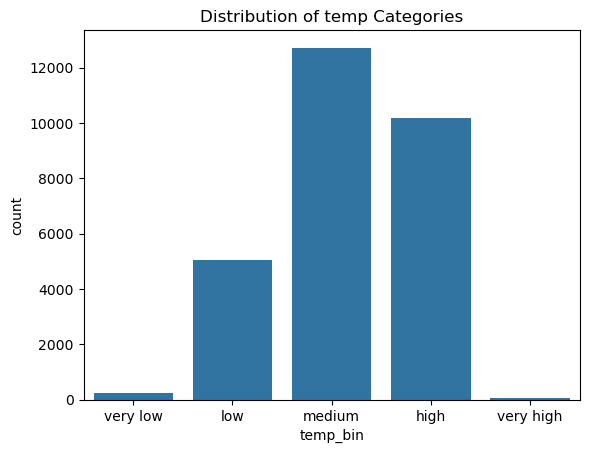

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='temp_bin', order=[ 'very low','low', 'medium', 'high','very high'])
plt.title("Distribution of temp Categories")
plt.show()


In [82]:
def categorize_rainfall(rain):
    if rain <= 250:
        return 'very low'
    elif rain <= 750:
        return 'low'
    elif rain <= 1250:
        return 'medium'
    elif rain <= 2000:
        return 'high'
    else:
        return 'very high'

# Apply the function
df['rainfall_bin'] = df['rainfall'].apply(lambda x: categorize_rainfall(x))

# Check results
print(df[['rainfall', 'rainfall_bin']].head(10))


   rainfall rainfall_bin
0    1485.0         high
1    1485.0         high
2    1485.0         high
3    1485.0         high
4    1485.0         high
5    1485.0         high
6    1485.0         high
7    1485.0         high
8    1485.0         high
9    1485.0         high


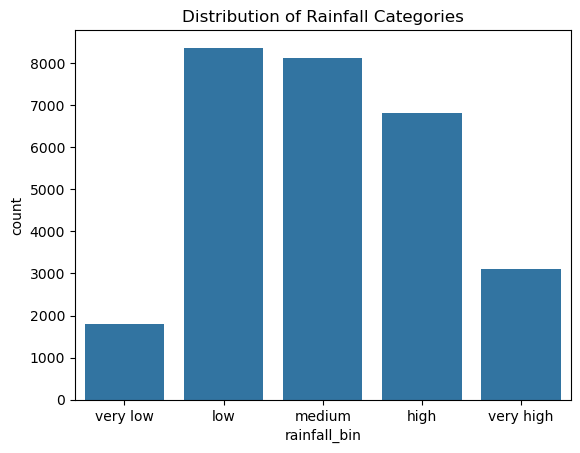

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='rainfall_bin', order=['very low', 'low', 'medium', 'high', 'very high'])
plt.title("Distribution of Rainfall Categories")
plt.show()


In [86]:
df

,Area,Item,Year,yield,rainfall,pesticides_tonnes,avg_temp,pesticides_log,temp_bin,rainfall_bin
0,Albania,Maize,1990,36613,1485.0,121.00,16.37,4.804021,medium,high
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37,4.804021,medium,high
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37,4.804021,medium,high
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37,4.804021,medium,high
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37,4.804021,medium,high
...,...,...,...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76,7.844268,medium,low
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76,7.844268,medium,low
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76,7.844268,medium,low
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76,7.844268,medium,low


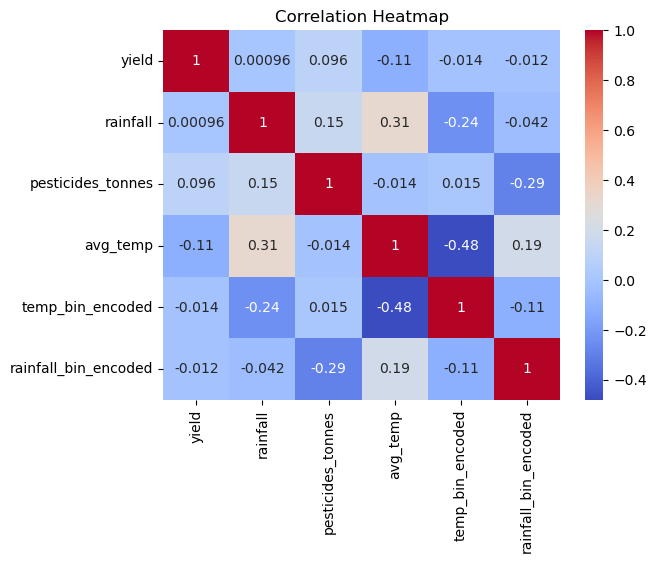

In [88]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical variables to numeric
encoder = LabelEncoder()
df['temp_bin_encoded'] = encoder.fit_transform(df['temp_bin'])
df['rainfall_bin_encoded'] = encoder.fit_transform(df['rainfall_bin'])

# Now, create the heatmap
sns.heatmap(df[['yield', 'rainfall', 'pesticides_tonnes', 'avg_temp', 'temp_bin_encoded', 'rainfall_bin_encoded']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


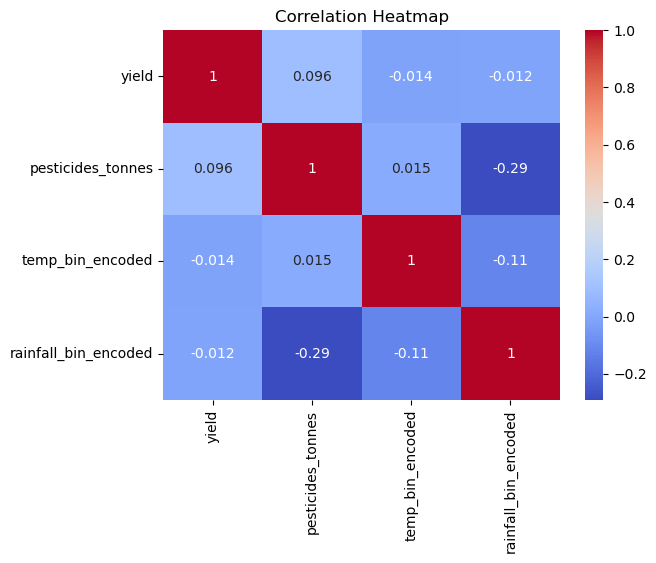

In [90]:
# Drop the unnecessary columns
df_filtered = df.drop(['rainfall', 'avg_temp'], axis=1)

# Convert categorical variables to numeric
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_filtered['temp_bin_encoded'] = encoder.fit_transform(df_filtered['temp_bin'])
df_filtered['rainfall_bin_encoded'] = encoder.fit_transform(df_filtered['rainfall_bin'])

# Create the heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_filtered[['yield', 'pesticides_tonnes', 'temp_bin_encoded', 'rainfall_bin_encoded']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [92]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
columns_to_scale = ['pesticides_tonnes', 'Year', 'yield']

scaled_values = scaler.fit_transform(df[columns_to_scale])

df[columns_to_scale] = scaled_values

df


,Area,Item,Year,yield,rainfall,pesticides_tonnes,avg_temp,pesticides_log,temp_bin,rainfall_bin,temp_bin_encoded,rainfall_bin_encoded
0,Albania,Maize,-1.637075,-0.476020,1485.0,-0.898870,16.37,4.804021,medium,high,2,0
1,Albania,Potatoes,-1.637075,-0.122257,1485.0,-0.898870,16.37,4.804021,medium,high,2,0
2,Albania,"Rice, paddy",-1.637075,-0.632338,1485.0,-0.898870,16.37,4.804021,medium,high,2,0
3,Albania,Sorghum,-1.637075,-0.759852,1485.0,-0.898870,16.37,4.804021,medium,high,2,0
4,Albania,Soybeans,-1.637075,-0.824592,1485.0,-0.898870,16.37,4.804021,medium,high,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",1.624512,-0.641190,657.0,-0.826396,19.76,7.844268,medium,low,2,1
28238,Zimbabwe,Sorghum,1.624512,-0.870899,657.0,-0.826396,19.76,7.844268,medium,low,2,1
28239,Zimbabwe,Soybeans,1.624512,-0.752295,657.0,-0.826396,19.76,7.844268,medium,low,2,1
28240,Zimbabwe,Sweet potatoes,1.624512,-0.645415,657.0,-0.826396,19.76,7.844268,medium,low,2,1


In [94]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['area_encoded'] = encoder.fit_transform(df['Area'])
df['item_encoded'] = encoder.fit_transform(df['Item'])

x = df[['area_encoded', 'item_encoded', 'Year', 'rainfall_bin_encoded', 'pesticides_tonnes', 'temp_bin_encoded']]
y = df['yield']

# Step 1: First split into train (90%) and test (10%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

# Step 2: Now split train data into train (80%) and validation (20%)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(f"Train set: {x_train.shape}")
print(f"Validation set: {x_val.shape}")
print(f"Test set: {x_test.shape}")


Train set: (20333, 6)
Validation set: (5084, 6)
Test set: (2825, 6)


In [102]:
df

,Area,Item,Year,yield,rainfall,pesticides_tonnes,avg_temp,pesticides_log,temp_bin,rainfall_bin,temp_bin_encoded,rainfall_bin_encoded,area_encoded,item_encoded
0,Albania,Maize,-1.637075,-0.476020,1485.0,-0.898870,16.37,4.804021,medium,high,2,0,0,1
1,Albania,Potatoes,-1.637075,-0.122257,1485.0,-0.898870,16.37,4.804021,medium,high,2,0,0,3
2,Albania,"Rice, paddy",-1.637075,-0.632338,1485.0,-0.898870,16.37,4.804021,medium,high,2,0,0,4
3,Albania,Sorghum,-1.637075,-0.759852,1485.0,-0.898870,16.37,4.804021,medium,high,2,0,0,5
4,Albania,Soybeans,-1.637075,-0.824592,1485.0,-0.898870,16.37,4.804021,medium,high,2,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",1.624512,-0.641190,657.0,-0.826396,19.76,7.844268,medium,low,2,1,100,4
28238,Zimbabwe,Sorghum,1.624512,-0.870899,657.0,-0.826396,19.76,7.844268,medium,low,2,1,100,5
28239,Zimbabwe,Soybeans,1.624512,-0.752295,657.0,-0.826396,19.76,7.844268,medium,low,2,1,100,6
28240,Zimbabwe,Sweet potatoes,1.624512,-0.645415,657.0,-0.826396,19.76,7.844268,medium,low,2,1,100,7


In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

# Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)

#gradient boosting
gb_model=GradientBoostingRegressor(random_state=42)
gb_model.fit(x_train,y_train)

GradientBoostingRegressor(random_state=42)

In [98]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions for validation set
y_pred_lr_val = lr_model.predict(x_val)
y_pred_rf_val = rf_model.predict(x_val)
y_pred_gb_val = gb_model.predict(x_val)

# Predictions for test set
y_pred_lr_test = lr_model.predict(x_test)
y_pred_rf_test = rf_model.predict(x_test)
y_pred_gb_test = gb_model.predict(x_test)

# Function to calculate metrics
def evaluate_model(y_true, y_pred, model_name, data_label):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{data_label} - {model_name}:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")

# Evaluate models on validation set
evaluate_model(y_val, y_pred_lr_val, "Linear Regression", "Validation")
evaluate_model(y_val, y_pred_rf_val, "Random Forest Regression", "Validation")
evaluate_model(y_val, y_pred_gb_val, "Gradient Boosting", "Validation")

# Evaluate models on test set
evaluate_model(y_test, y_pred_lr_test, "Linear Regression", "Test")
evaluate_model(y_test, y_pred_rf_test, "Random Forest Regression", "Test")
evaluate_model(y_test, y_pred_gb_test, "Gradient Boosting", "Test")



Validation - Linear Regression:
MAE: 0.7358
MSE: 0.9466
R² Score: 0.0700

Validation - Random Forest Regression:
MAE: 0.0412
MSE: 0.0146
R² Score: 0.9856

Validation - Gradient Boosting:
MAE: 0.2583
MSE: 0.1806
R² Score: 0.8225

Test - Linear Regression:
MAE: 0.7353
MSE: 0.9316
R² Score: 0.0761

Test - Random Forest Regression:
MAE: 0.0376
MSE: 0.0111
R² Score: 0.9890

Test - Gradient Boosting:
MAE: 0.2576
MSE: 0.1724
R² Score: 0.8290


In [100]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define parameter grid with balanced choices
param_grid = {
    'n_estimators': np.arange(100, 501, 100), 
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['sqrt', 'log2'], 
    'bootstrap': [True]  
}


rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(
    rf, param_grid, n_iter=50, cv=3, scoring='r2', n_jobs=-1, random_state=42
)

random_search.fit(x_train, y_train)

print("Best Hyperparameters:", random_search.best_params_)
print("Best R² Score:", random_search.best_score_)


Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}
Best R² Score: 0.9679465884497969


In [108]:

best_rf_model = random_search.best_estimator_


y_pred_best_rf = best_rf_model.predict(x_test)


mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)

print("Best Model Performance:")
print("Mean Squared Error:", mse_best_rf)
print("R² Score:", r2_best_rf)
print("Mean Absolute Error:", mae_best_rf)


Best Model Performance:
Mean Squared Error: 0.017968347441663694
R² Score: 0.9821798524535196
Mean Absolute Error: 0.05861081008448895


Text(0, 0.5, 'Actual')

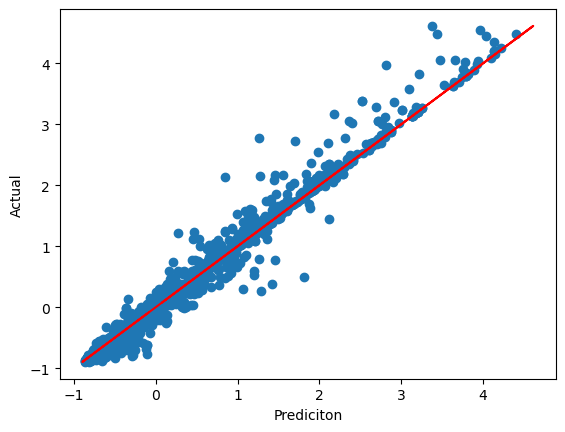

In [110]:
plt.scatter(y_pred_best_rf, y_test)
plt.plot(y_test, y_test, 'r')
plt.xlabel("Prediciton")
plt.ylabel("Actual")

In [133]:
x_test.shape,y_test.shape

((2624, 6), (2624,))

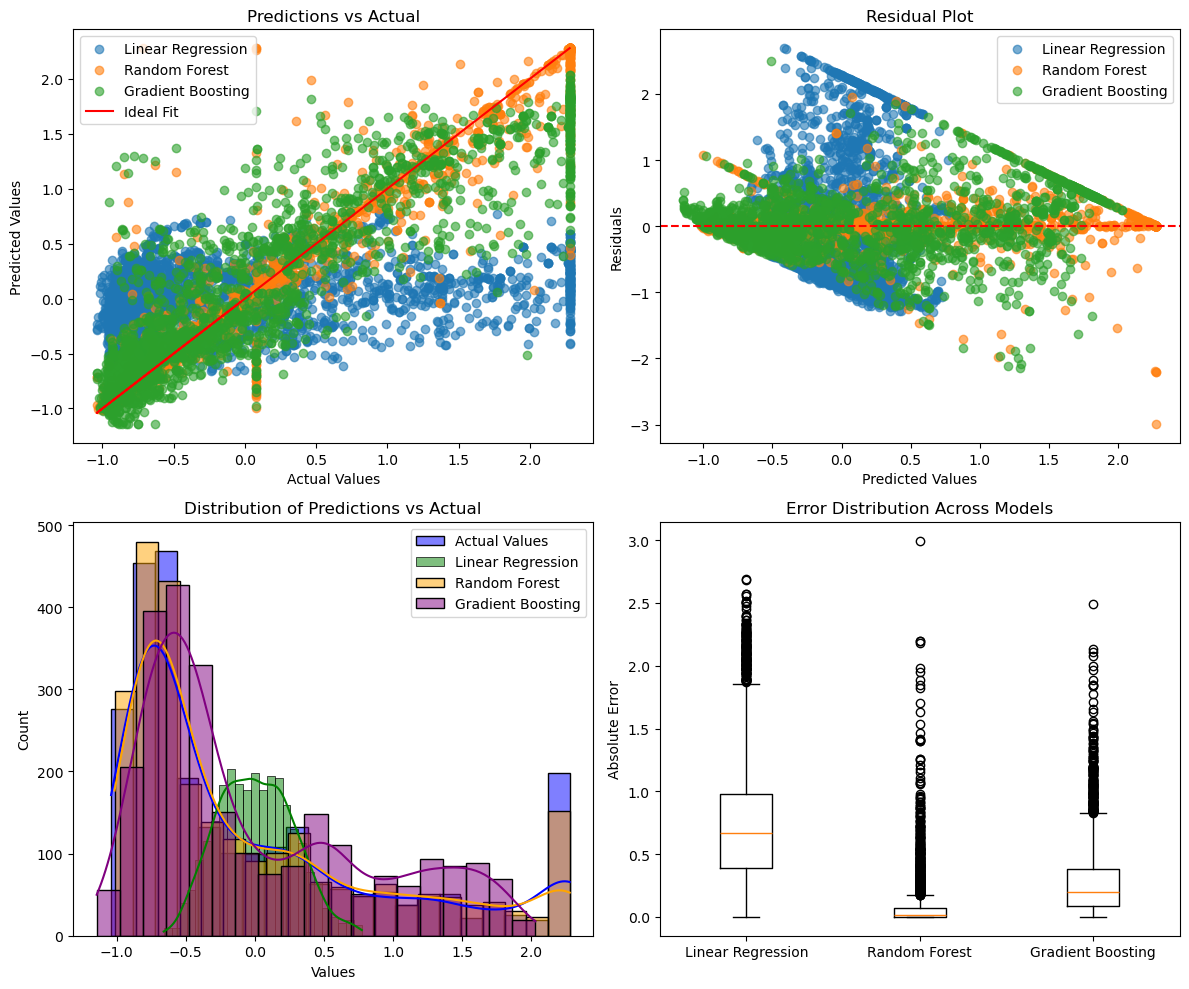

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Scatter plot: Predictions vs Actual
axes[0, 0].scatter(y_test, y_pred_lr_test, label="Linear Regression", alpha=0.6)
axes[0, 0].scatter(y_test, y_pred_rf_test, label="Random Forest", alpha=0.6)
axes[0, 0].scatter(y_test, y_pred_gb_test, label="Gradient Boosting", alpha=0.6)
axes[0, 0].plot(y_test, y_test, 'r', label="Ideal Fit")  # Perfect prediction line
axes[0, 0].set_title("Predictions vs Actual")
axes[0, 0].set_xlabel("Actual Values")
axes[0, 0].set_ylabel("Predicted Values")
axes[0, 0].legend()

# Residual Plot: Errors vs Predictions
axes[0, 1].scatter(y_pred_lr_test, y_test - y_pred_lr_test, label="Linear Regression", alpha=0.6)
axes[0, 1].scatter(y_pred_rf_test, y_test - y_pred_rf_test, label="Random Forest", alpha=0.6)
axes[0, 1].scatter(y_pred_gb_test, y_test - y_pred_gb_test, label="Gradient Boosting", alpha=0.6)
axes[0, 1].axhline(0, color='r', linestyle="--")  # Reference line
axes[0, 1].set_title("Residual Plot")
axes[0, 1].set_xlabel("Predicted Values")
axes[0, 1].set_ylabel("Residuals")
axes[0, 1].legend()

# Distribution Plot: Comparing Actual & Predictions
sns.histplot(y_test, label="Actual Values", kde=True, color="blue", ax=axes[1, 0])
sns.histplot(y_pred_lr_test, label="Linear Regression", kde=True, color="green", ax=axes[1, 0])
sns.histplot(y_pred_rf_test, label="Random Forest", kde=True, color="orange", ax=axes[1, 0])
sns.histplot(y_pred_gb_test, label="Gradient Boosting", kde=True, color="purple", ax=axes[1, 0])
axes[1, 0].set_title("Distribution of Predictions vs Actual")
axes[1, 0].set_xlabel("Values")
axes[1, 0].legend()

# Error Bar Plot: Absolute Errors Across Models
errors = [abs(y_test - y_pred_lr_test), abs(y_test - y_pred_rf_test), abs(y_test - y_pred_gb_test)]
labels = ["Linear Regression", "Random Forest", "Gradient Boosting"]
axes[1, 1].boxplot(errors, labels=labels)
axes[1, 1].set_title("Error Distribution Across Models")
axes[1, 1].set_ylabel("Absolute Error")

# Adjust layout for clarity
plt.tight_layout()
plt.show()


In [143]:
import pickle

# Save the best model after hyperparameter tuning
with open('best_rf_model.pkl', 'wb') as file:
    pickle.dump(best_rf_model, file)


In [139]:
joblib.dump(scaler, 'scaler.pkl')  # Example for a scaler
joblib.dump(encoder, 'encoder.pkl')  # Example for an encoder


['encoder.pkl']

In [141]:
best_rf_model_loaded = joblib.load('best_rf_model.pkl')

In [149]:
joblib.dump(best_rf_model, 'best_rf_model.pkl')
joblib.dump(scaler, 'scaler.pkl')



['scaler.pkl']

In [139]:
scaled_df

,pesticides_tonnes,Year,yield
0,-0.643135,-1.719988,-0.503969
1,-0.643135,-1.719988,-0.128445
2,-0.643135,-1.719988,-0.669902
3,0.012519,-1.719988,-0.805261
4,-0.643135,-1.719988,-0.873983
...,...,...,...
27397,-0.600069,1.714441,-0.679299
27398,-0.600069,1.714441,-0.923138
27399,-0.600069,1.714441,-0.797239
27400,0.012519,1.714441,-0.683784


In [132]:
import pandas as pd

top_areas = df['Area'].value_counts().head(5).index
top_items = df['Item'].value_counts().head(5).index

df['Area'] = df['Area'].apply(lambda x: x if x in top_areas else 'Other_Area')
df['Item'] = df['Item'].apply(lambda x: x if x in top_items else 'Other_Item')


df_dummies = pd.get_dummies(df, columns=['Area', 'Item'])
df_dummies.columns


C:\Users\Ritu\AppData\Local\Temp\ipykernel_4912\3041164649.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Area'] = df['Area'].apply(lambda x: x if x in top_areas else 'Other_Area')
C:\Users\Ritu\AppData\Local\Temp\ipykernel_4912\3041164649.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Item'] = df['Item'].apply(lambda x: x if x in top_items else 'Other_Item')


Index(['Year', 'yield', 'rainfall', 'pesticides_tonnes', 'avg_temp',
       'temp_bin', 'rainfall_bin', 'Area_Brazil', 'Area_India', 'Area_Mexico',
       'Area_Other', 'Area_Other_Area', 'Area_Pakistan', 'Item_Maize',
       'Item_Other_Item', 'Item_Potatoes', 'Item_Rice, paddy', 'Item_Soybeans',
       'Item_Wheat'],
      dtype='object')

In [130]:
df_encoded = pd.get_dummies(df, columns=['temp_bin','rainfall_bin'], drop_first=True)
df_encoded

,Area,Item,Year,yield,rainfall,pesticides_tonnes,avg_temp,temp_bin_low,temp_bin_medium,rainfall_bin_low,rainfall_bin_medium,rainfall_bin_very high,rainfall_bin_very low
0,Other,Maize,1990,36613.0,1485.000000,121.000000,16.37,False,True,False,False,False,False
1,Other,Potatoes,1990,66667.0,1146.609957,121.000000,16.37,False,True,False,True,False,False
2,Other,"Rice, paddy",1990,23333.0,1485.000000,121.000000,16.37,False,True,False,False,False,False
3,Other,Sorghum,1990,12500.0,1485.000000,37101.733735,16.37,False,True,False,False,False,False
4,Other,Soybeans,1990,7000.0,1485.000000,121.000000,16.37,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28237,Other,Potatoes,2013,22581.0,657.000000,2550.070000,19.76,False,True,True,False,False,False
28238,Other,Sorghum,2013,3066.0,657.000000,2550.070000,19.76,False,True,True,False,False,False
28239,Other,Potatoes,2013,13142.0,657.000000,2550.070000,19.76,False,True,True,False,False,False
28240,Other,Sweet potatoes,2013,22222.0,657.000000,37101.733735,19.76,False,True,True,False,False,False


In [55]:
categorical_features = ['Area', 'Item']
numerical_features = ['rainfall', 'pesticides_tonnes', 'avg_temp']
 

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df.loc[:, numerical_features] = scaler.fit_transform(df[numerical_features])
df[numerical_features]

,rainfall,pesticides_tonnes,avg_temp
0,0.501842,-0.643135,-0.687603
1,-0.000278,-0.643135,-0.687603
2,0.501842,-0.643135,-0.687603
3,0.501842,0.012519,-0.687603
4,0.501842,-0.643135,-0.687603
...,...,...,...
28237,-0.726786,-0.600069,-0.125669
28238,-0.726786,-0.600069,-0.125669
28239,-0.726786,-0.600069,-0.125669
28240,-0.726786,0.012519,-0.125669


In [68]:
df_encoded = pd.get_dummies(df, columns=categorical_features)
df_encoded

,Year,yield,rainfall,pesticides_tonnes,avg_temp,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990.0,36613.0,0.501842,-0.643135,-0.687603,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1990.0,66667.0,-0.000278,-0.643135,-0.687603,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,1990.0,23333.0,0.501842,-0.643135,-0.687603,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,1990.0,12500.0,0.501842,0.012519,-0.687603,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1990.0,7000.0,0.501842,-0.643135,-0.687603,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28237,2013.0,22581.0,-0.726786,-0.600069,-0.125669,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
28238,2013.0,3066.0,-0.726786,-0.600069,-0.125669,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
28239,2013.0,13142.0,-0.726786,-0.600069,-0.125669,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
28240,2013.0,22222.0,-0.726786,0.012519,-0.125669,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
0from sklearn.model_selection import train_test_splp;ljhvf=-0it
x=df.drop('yield',axis=1)
y=df['yield']

# 

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [76]:
df

,Area,Item,yield,rainfall,pesticides_tonnes,avg_temp,Year_only,temp_bin,rainfall_bin
0,Albania,Maize,36613.0,1485.000000,121.000000,16.37,1990,medium,high
1,Albania,Potatoes,66667.0,1146.609957,121.000000,16.37,1990,medium,medium
2,Albania,"Rice, paddy",23333.0,1485.000000,121.000000,16.37,1990,medium,high
3,Albania,Sorghum,12500.0,1485.000000,37101.733735,16.37,1990,medium,high
4,Albania,Soybeans,7000.0,1485.000000,121.000000,16.37,1990,medium,high
...,...,...,...,...,...,...,...,...,...
28237,Zimbabwe,Potatoes,22581.0,657.000000,2550.070000,19.76,2013,medium,low
28238,Zimbabwe,Sorghum,3066.0,657.000000,2550.070000,19.76,2013,medium,low
28239,Zimbabwe,Potatoes,13142.0,657.000000,2550.070000,19.76,2013,medium,low
28240,Zimbabwe,Sweet potatoes,22222.0,657.000000,37101.733735,19.76,2013,medium,low


In [78]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error ,r2_score